In [ ]:
#Data Analysis of the Heart.csv dataset. 
#To predict which individual will have heart disease or not from the data by training a model

In [1]:
#importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Loading the dataset.
df=pd.read_csv("C:\\Users\\YOMIJAY\\Documents\\Data science training\\10Alytics\\Assignments\\heart.csv")

In [ ]:
#Exploring the data set

In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int32  
 2   ChestPainType   918 non-null    int32  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int32  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int32  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int32  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int32(5), int64(6)
memory usage: 68.3 KB


In [6]:
#Investigating the dimensionality of the dataset
df.shape

(918, 12)

In [7]:
#investigating for any missing data

df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [8]:
#Extracting the unique values of columns(features)

print("Sex",df["Sex"].unique())
print("ChestPainType",df["ChestPainType"].unique())
print("RestingECG",df["RestingECG"].unique()) 
print("ExerciseAngina",df["ExerciseAngina"].unique())
print("ST_Slope",df["ST_Slope"].unique())

Sex ['M' 'F']
ChestPainType ['ATA' 'NAP' 'ASY' 'TA']
RestingECG ['Normal' 'ST' 'LVH']
ExerciseAngina ['N' 'Y']
ST_Slope ['Up' 'Flat' 'Down']


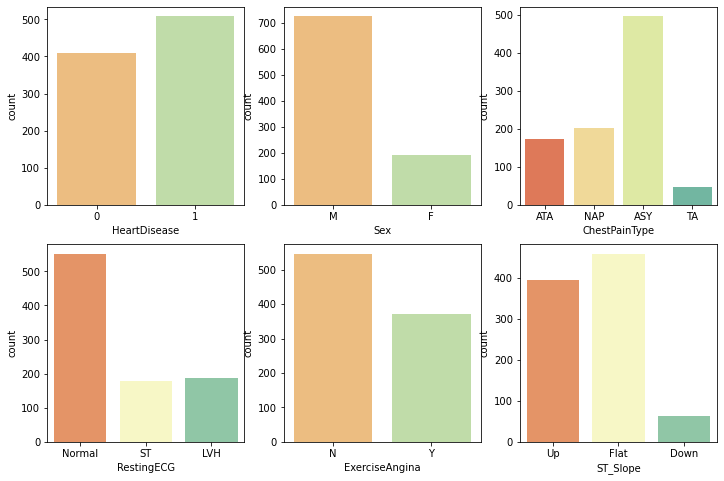

In [9]:
#Creating a subplot to visualize categorical data
f, axes =plt.subplots(2,3, figsize=(12,8))

sns.countplot(x= df["HeartDisease"], data=df, palette= "Spectral", ax= axes[0,0])
sns.countplot(x= df["Sex"], data=df, palette= "Spectral", ax= axes[0,1])
sns.countplot(x= df["ChestPainType"], data=df, palette= "Spectral", ax= axes[0,2])

sns.countplot(x= df["RestingECG"], data=df, palette= "Spectral", ax= axes[1,0])
sns.countplot(x= df["ExerciseAngina"], data=df, palette= "Spectral", ax= axes[1,1])
sns.countplot(x= df["ST_Slope"], data=df, palette= "Spectral", ax= axes[1,2])
plt.show()

In [11]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


<Figure size 792x576 with 0 Axes>

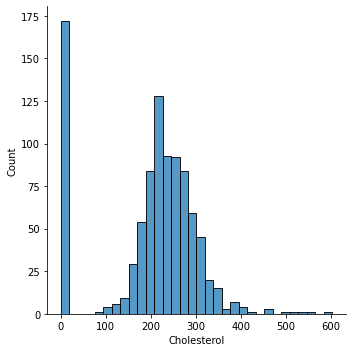

In [12]:
#Investigate the distribution of some numerical features
#Cholesterol

plt.figure(figsize = (11,8))
sns.displot(df["Cholesterol"])
plt.show()

<Figure size 792x576 with 0 Axes>

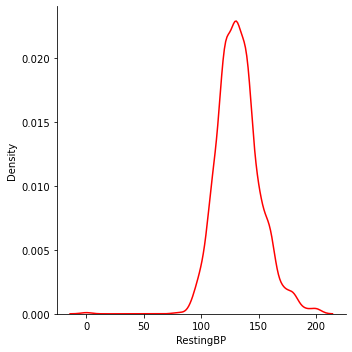

In [13]:
#RestingBP

plt.figure(figsize = (11,8))
sns.displot(df["RestingBP"], color='red', kind = 'kde')
plt.show()

MACHINE LEARNING -Heart Data


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [15]:
#Transform categorical data into numeric data - using label encoder
from sklearn.preprocessing import LabelEncoder

In [16]:
le =LabelEncoder()

In [21]:
#transformation process

df["Sex"]= le.fit_transform(df["Sex"])
df["ChestPainType"]= le.fit_transform(df["ChestPainType"])
df["RestingECG"]= le.fit_transform(df["RestingECG"])
df["ExerciseAngina"]= le.fit_transform(df["ExerciseAngina"])
df["ST_Slope"]= le.fit_transform(df["ST_Slope"])

df.head()
#This transforms the categorical labels in the dataset into numerical data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


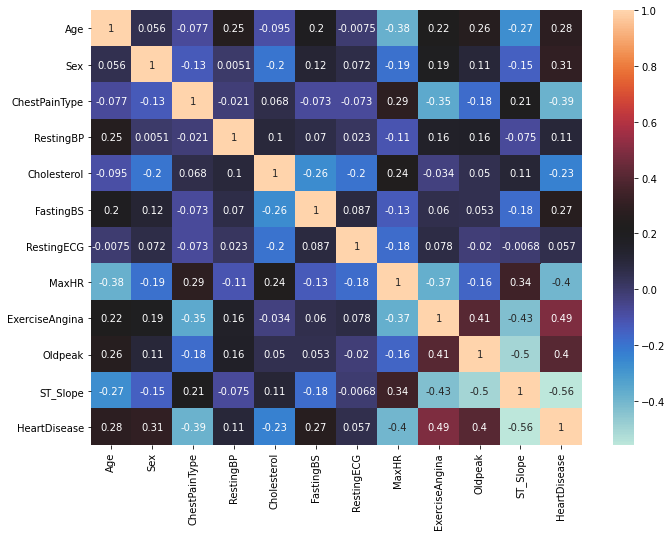

In [22]:
#Correlation
#Check the correlation between the labels

plt.figure(figsize =(11,8))
sns.heatmap(df.corr(), annot =True, cmap= "icefire")
plt.show()

In [24]:
#Split dataset into train and test set 
#Remove the label you want to predict column i.e removed "Heart Disease column"


x= df.drop("HeartDisease", axis=1) #Dataset without the Label(Heart Disease)
y= df["HeartDisease"]    #Label i.e The dropped column

x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 79.0 KB


In [31]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.4)
print("x_train: ", x_train.shape)
print("x_test: ", x_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

x_train:  (550, 11)
x_test:  (368, 11)
y_train:  (550,)
y_test:  (368,)


In [32]:
#Apply a machine learning algorithm (AdaBoostClassifier) to our training set
from sklearn.ensemble import AdaBoostClassifier

abc=AdaBoostClassifier()

In [33]:
model = abc.fit(x_train, y_train)

In [36]:
#confirm AdaBoostClassifier prediction
pred =model.predict(x_test)
print(pred)

[0 0 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1
 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 1 0 0 1 0
 0 0 0 0 1 0 1 1 0 1 0 0 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0
 1 1 1 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 1 0 0 0 1 0
 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0
 1 0 0 0 1 0 1 1 1 0 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1
 0 0 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 1 1 0 1 1 0
 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 0 1 0 1 1 1 1 1 0 1 0 1 0 0 0 0 1 1
 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0
 0 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 0 1 0 1 1 0]


In [72]:
#Use accuracy_score to check the degree of accuracy of the preditcion with the test data (y_test)
#Convert the result to 2-decimal places in percentage

from sklearn.metrics import accuracy_score
print("The accuracy for AdaBoost is: ",round(accuracy_score(y_test, pred)*100),"%")

The accuracy for AdaBoost is:  88 %


In [94]:
#Apply other machine learning algortihms

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Machine Learning Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score






In [95]:

classifiers = [
    [RandomForestClassifier(), "Random Forest"],
    [XGBClassifier(), "XGB Classifier"],
    [KNeighborsClassifier(), "K-Nearest Neighbors"],
    [SGDClassifier(), "SGD"],
    [SVC(), "Support Vector Machine"],
    [GaussianNB(), "Naive Bayes"],
    [DecisionTreeClassifier(), "Decision Tree"],
    [LogisticRegression(), "Logistics Regression"]
]


In [96]:
score_list = {}
cross_val = {}
roc_auc = {}
accuracy_s = {}
for i in classifiers:
    model = i[0]
    model.fit(x_train, y_train)
    model_name = i[1]
    pred = model.predict(x_test)
    score = model.score(x_test, y_test)
    CV = cross_val_score(model, x_test, y_test).mean()
    RA = roc_auc_score(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    score_list[model_name] = ([str(round(score*100, 2)) + "%"])
    cross_val[model_name] = ([str(round(CV *100, 2)) + '%'])
    accuracy_s[model_name] = ([str(round(accuracy*100, 2)) + "%"])
    roc_auc[model_name] = ([str(round(RA*100, 2)) + "%"])
    if model_name != classifiers[-1][1]:
        print("")

C:\Users\YOMIJAY\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:49:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\YOMIJAY\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:49:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\YOMIJAY\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:49:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\YOMIJAY\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:49:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\YOMIJAY\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:49:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\YOMIJAY\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:49:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.








C:\Users\YOMIJAY\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\YOMIJAY\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

In [97]:
print("Accuracy Score")
AS = pd.DataFrame(score_list)
AS.head()

Accuracy Score


,Random Forest,XGB Classifier,K-Nearest Neighbors,SGD,Support Vector Machine,Naive Bayes,Decision Tree,Logistics Regression
0,87.23%,86.41%,69.29%,55.43%,70.11%,86.41%,80.71%,86.41%


In [98]:
print("cross validation")
cross_v=pd.DataFrame(cross_val)
cross_v.head()

cross validation


,Random Forest,XGB Classifier,K-Nearest Neighbors,SGD,Support Vector Machine,Naive Bayes,Decision Tree,Logistics Regression
0,84.51%,83.69%,65.76%,66.32%,68.49%,84.49%,77.45%,86.68%


In [99]:
print("roc_auc")
roc_a=pd.DataFrame(roc_auc)
roc_a.head()

roc_auc


,Random Forest,XGB Classifier,K-Nearest Neighbors,SGD,Support Vector Machine,Naive Bayes,Decision Tree,Logistics Regression
0,87.13%,86.29%,69.19%,56.14%,69.99%,86.39%,80.63%,86.36%
